# Lecture 6: Access the Raster Data
## Lecture notes: https://carpentries-incubator.github.io/geospatial-python/06-raster-intro/index.html

In [1]:
import pystac

In [4]:
items = pystac.ItemCollection.from_file("search.json")

items

In [6]:
print(items[0])

<Item id=S2A_31UFU_20200328_0_L2A>


In [7]:
import rioxarray 

In [8]:
items[0]

<Item id=S2A_31UFU_20200328_0_L2A>

In [17]:
nir9_href = items[0].assets['nir09'].href   #zeroth item, nir 09 asset

In [19]:
raster_ams_b9 = rioxarray.open_rasterio(nir9_href)  #amsterdam, band 9 raster values

In [20]:
raster_ams_b9  #see the metadata for one location, 

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [48]:
raster_ams_b9.rio.resolution()    #check the resolution in m; near infrared band is 60 by 60 m

(60.0, -60.0)

In [49]:
raster_ams_b9.sel(band=1)   #sel the data  x = longitude, y=latitutde

<xarray.DataArray (y: 1830, x: 1830)>
array([[    0,     0,     0, ...,  8888,  9075,  8139],
       [    0,     0,     0, ..., 10444, 10358,  8669],
       [    0,     0,     0, ..., 10346, 10659,  9168],
       ...,
       [    0,     0,     0, ...,  4295,  4289,  4320],
       [    0,     0,     0, ...,  4291,  4269,  4179],
       [    0,     0,     0, ...,  3944,  3503,  3862]], dtype=uint16)
Coordinates:
    band         int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [50]:
raster_ams_b9.sel(band=1,x=600030)   #sel the data  x = longitude, 1830 latitudinal points, band = 9


<xarray.DataArray (y: 1830)>
array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)
Coordinates:
    band         int64 1
    x            float64 6e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [51]:
#To use rio geospatial over xarray
# xarray is for spatial data without a reference system

In [52]:
raster_ams_b9.rio.crs #shows the EPSG code


CRS.from_epsg(32631)

In [53]:
raster_ams_b9.rio.bounds()  #less than and greater than function means we need parentheses

(600000.0, 5790240.0, 709800.0, 5900040.0)

In [54]:
raster_ams_b9.rio.width

1830

In [35]:
raster_ams_b9.rio.height

1830

In [37]:
raster_ams_b9.values #print out the summary of values in the four corners of data (loads the data briefly without storing)

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

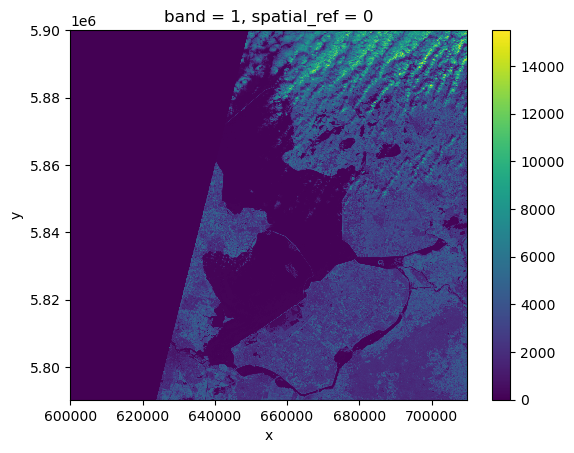

In [38]:
#Plotting the data
raster_ams_b9.plot()   #Uses matplotlib to show amsterdam

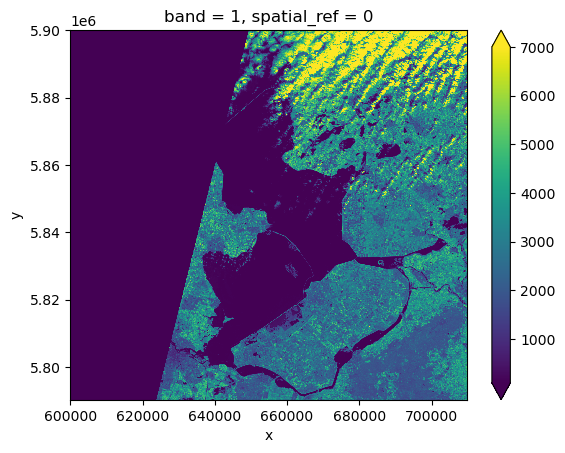

In [60]:
#Improve the plot
raster_ams_b9.plot(vmin=100,vmax=7000)   #Pull a documentation use "??" with the plot command
#vmin = min value, vmax=max value

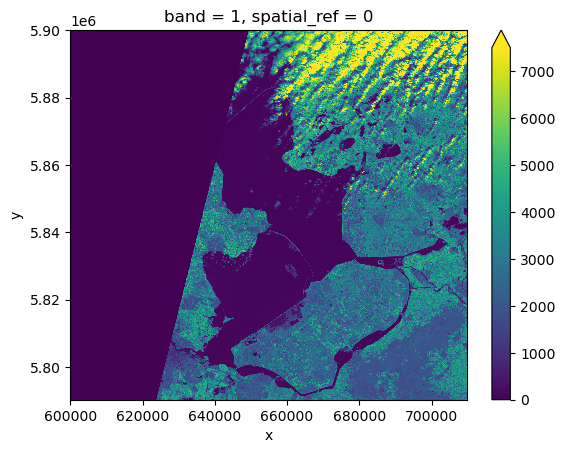

In [67]:
raster_ams_b9.plot(robust=True)

## Grabbing the EPSG number

In [69]:
type(raster_ams_b9.rio.crs.to_epsg())

int

In [73]:
epsg = raster_ams_b9.rio.crs.to_epsg()  #EPSG code is just how the geography is defined

In [79]:
from pyproj import CRS   #This is a different type of projection than EPSG

crs = CRS(epsg)
crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [80]:
crs.area_of_use  #Check the area of the section

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

In [78]:
dir(CRS)   #many different methods to call for the CRS object

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'is_bound',
 'is_compound',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'source_crs',
 'sub_crs_list',
 'target_crs',
 'to_2d',


In [81]:
raster_ams_b9.min() #Minimum value in raster xarray

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0

In [82]:
raster_ams_b9.min().values  #Numpy object  for mean value

array(0, dtype=uint16)

In [83]:
type(raster_ams_b9.min().values)  #To get the numpy data

numpy.ndarray

In [84]:
raster_ams_b9.mean() #standard deviation of the values

<xarray.DataArray ()>
array(1652.44009944)
Coordinates:
    spatial_ref  int64 0

In [85]:
raster_ams_b9.std() #standard deviation of the values

<xarray.DataArray ()>
array(2049.16447495)
Coordinates:
    spatial_ref  int64 0

In [86]:
raster_ams_b9.quantile([.25, .75]) #25% and 75% quantiles


<xarray.DataArray (quantile: 2)>
array([   0., 2911.])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75

## Xarray is built on numpy


In [87]:
import numpy as np

In [93]:
np.percentile(raster_ams_b9,25)

0.0

In [94]:
np.percentile(raster_ams_b9,75)

2911.0

In [97]:
#Reading the single capture values {item 0} again, nir09 values, with NaN the zero values with "masked=True"
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets['nir09'].href,masked = True)

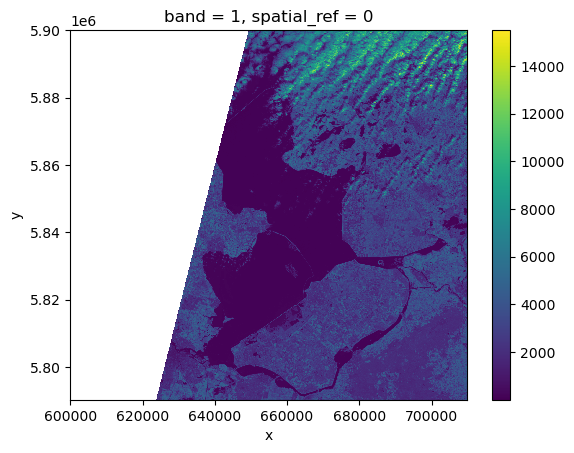

In [98]:
raster_ams_b9.plot()

In [99]:
raster_ams_b9.min()

<xarray.DataArray ()>
array(8., dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [102]:
raster_ams_b9.min.values

array(8., dtype=float32)

In [116]:
raster_ams_overview = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level=3)

#Higher overview_level=3 gives lower resolution {farther}   
# Band== 0: Red, 1: Green, 2: Blue 

In [117]:
raster_ams_overview  #3 bands this time: Three band array

<xarray.DataArray (band: 3, y: 687, x: 687)>
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.001e+05 6.002e+05 ... 7.096e+05 7.097e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [118]:
raster_ams_overview.shape  #Total shape

(3, 687, 687)

In [119]:
raster_ams_overview.sel(band=3).shape

(687, 687)

(array([481980., 235209., 318654., 131536.,  55567.,  37719.,  30584.,
         22951.,  21211.,  80496.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

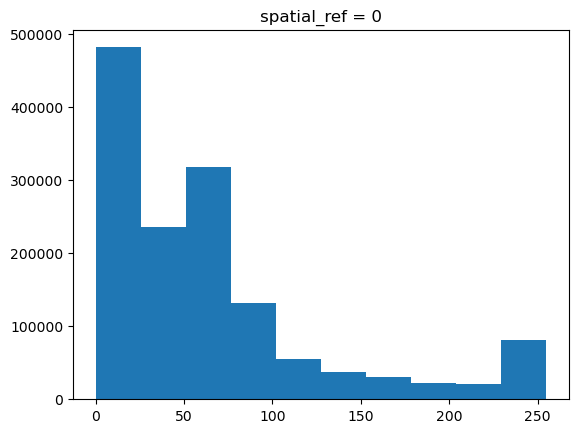

In [120]:
raster_ams_overview.plot()  #This is a histogram and not an image so we need imshow

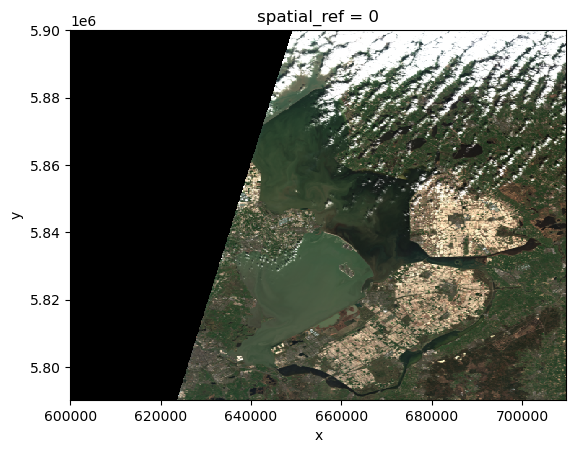

In [121]:
raster_ams_overview.plot.imshow()

In [129]:
items[0].assets['aot']

<Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/AOT.tif>